In [3]:
import tensorflow as tf

In [4]:
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [6]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000002DECADB75F8>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000002DECD645668>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000002DECADB7518>)

In [7]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [9]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
mnist.train.num_examples

55000

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

mnist.train.images[1].reshape(28, 28)

In [20]:
single_img = mnist.train.images[50].reshape(28, 28)

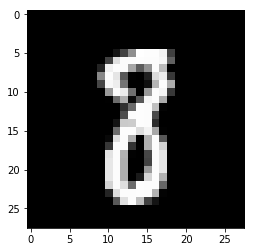

In [22]:
plt.imshow(single_img, cmap='gist_gray')

In [23]:
single_img.min()

0.0

In [24]:
single_img.max()

1.0

In [26]:
# placeholders comments
x = tf.placeholder(tf.float32, shape=[None, 784])

In [29]:
# varisables
w = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [31]:
#Create graph
y = tf.matmul(x,w) + b

In [33]:
# Loss Function
y_true = tf.placeholder(tf.float32, [None, 10])

In [35]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y))

In [41]:
# OPTIMIZER
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optimizer.minimize(cross_entropy)

In [43]:
# create session 
init = tf.global_variables_initializer()

In [44]:
# create session
with tf.Session() as sess:
    sess.run(init)
    for step in range(1000):
        batch_x, batch_y = mnist.train.next_batch(100)
        sess.run(train, feed_dict={x:batch_x, y_true:batch_y})

In [48]:
xx1 = tf.arg_max(y_true,1)

In [51]:
xx1

<tf.Tensor 'ArgMax_3:0' shape=(?,) dtype=int64>

In [52]:
pred = tf.equal(tf.arg_max(y,1), tf.arg_max(y_true, 1))